
####Let's build a neural network for the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class, CIFAR-10 is a dataset that consists of 60000 32x32 colour images in 10 classes like"airplane","automobile","bird","cat","deer","dog","frog" .etc.



##load dataset

In [1]:
from keras.datasets import cifar10


In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

##Split the dataset into x_train,y_train,x_test,y_test

In [3]:
#load cifer10 dataset and split it.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


###normalize data from 0 to 1

In [4]:
#change train data and test data into float32 and divide by 255
#That normalizes data from 1 to 0.
x_train = x_train.astype('float32')/255
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')/255

###Convert y_train and y_test into 10 categories

In [5]:
#convert y_train and y_test into 10 categories
y_train = kr.utils.to_categorical(y_train, 10)
y_test  = kr.utils.to_categorical(y_test,10)

###Let's show images of Cifer-10 images

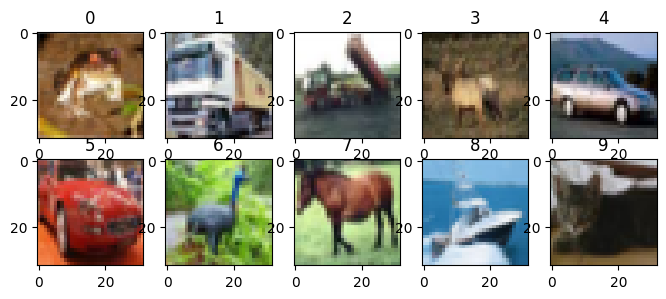

In [6]:
plt.figure(figsize=(8,8))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.title(i)
    plt.imshow(x_train[i].reshape(32,32,3))

##Let's build 1st CNN model with Adam optimizer

In [7]:
#build 1st model
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

####Let's fit 1st CNN model with Adam optimizer

In [8]:
#model fitting
result1=model.fit(x_train, y_train,batch_size=128, epochs=20)

Epoch 1/20
391/391 [==============================] - 8s 9ms/step - loss: 1.4674 - accuracy: 0.4774
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 1.0301 - accuracy: 0.6376
Epoch 3/20
391/391 [==============================] - 4s 9ms/step - loss: 0.8464 - accuracy: 0.7042
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.7065 - accuracy: 0.7539
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 0.5765 - accuracy: 0.7994
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 0.4426 - accuracy: 0.8473
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.3140 - accuracy: 0.8943
Epoch 8/20
391/391 [==============================] - 3s 8ms/step - loss: 0.2056 - accuracy: 0.9338
Epoch 9/20
391/391 [==============================] - 4s 9ms/step - loss: 0.1302 - accuracy: 0.9595
Epoch 10/20
391/391 [==============================] - 3s 9ms/step - loss: 0.0803 - accuracy: 0.977

##Let's build 2nd CNN model with RMSprop optimizer

In [9]:
#Build 2nd model.
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      


###Let's fit 2nd CNN model with RMSprop optimizer

In [10]:
result2=model.fit(x_train, y_train,batch_size=128, epochs=20)


Epoch 1/20
391/391 [==============================] - 4s 7ms/step - loss: 1.6380 - accuracy: 0.4156
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 1.2117 - accuracy: 0.5731
Epoch 3/20
391/391 [==============================] - 3s 9ms/step - loss: 1.0228 - accuracy: 0.6423
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 0.8964 - accuracy: 0.6859
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.7888 - accuracy: 0.7246
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 0.6920 - accuracy: 0.7617
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 0.5957 - accuracy: 0.7926
Epoch 8/20
391/391 [==============================] - 3s 7ms/step - loss: 0.4985 - accuracy: 0.8288
Epoch 9/20
391/391 [==============================] - 3s 7ms/step - loss: 0.4062 - accuracy: 0.8599
Epoch 10/20
391/391 [==============================] - 3s 7ms/step - loss: 0.3145 - accuracy: 0.8937

###Evaluate the two models by using two metrics, loss and accuracy

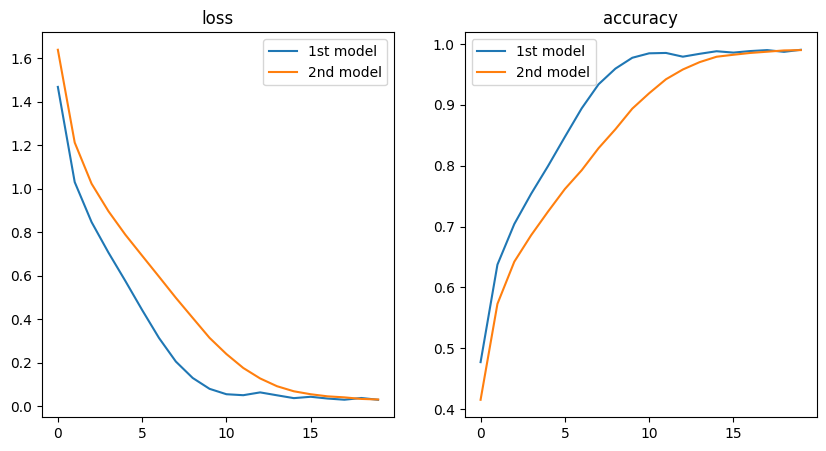

In [11]:
#Evaluate the two models by using two metrics, loss and accuracy.
metrics = ['loss', 'accuracy']
#show the evaluation result by using matoplot.
plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]
    #set subplots to show the result
    plt.subplot(1, 2, i+1)
    #Titles of subplots are "loss" and "accuracy"
    plt.title(metric)
    plt_result1 = result1.history[metric]
    plt_result2 = result2.history[metric]

    #plot them all
    plt.plot(plt_result1, label='1st model')
    plt.plot(plt_result2, label='2nd model')
    plt.legend()
plt.show()

###How to predict a single photo data?

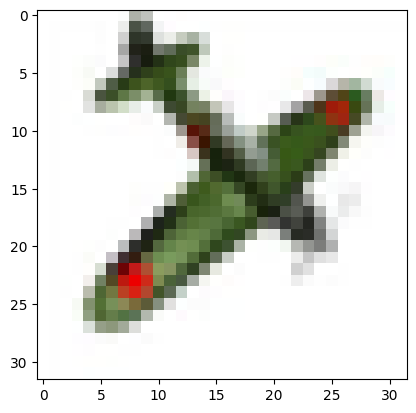

In [12]:
plt.imshow(x_test[[98]].reshape(32,32,3))


In [13]:
#Let's predict.
prediction=model.predict(x_test[[98]])
prediction

1/1 [==============================] - 0s 227ms/step


array([[8.0224687e-05, 3.4774283e-30, 9.9990940e-01, 1.0378088e-05,
        9.4330982e-17, 3.9066799e-21, 6.2347399e-10, 6.8574530e-22,
        3.2361405e-24, 6.9740746e-32]], dtype=float32)

In [14]:
names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
#Preparation for this predction.
list1=[]
[list1.append(i) for i in range(26)]
list2=[]
[list2.append(i) for i in names]
dic = dict(zip(list1, list2))
#Let's check the result.
print("The answer is",dic[np.argmax(prediction)],"!")

The answer is bird !


##Let's predict whole test data!

In [15]:
#Let's predict whole test data!
predictions = model.predict(x_test)
results = np.argmax(predictions,axis=1)
results = pd.Series(results, name="Label")
results.tail()

313/313 [==============================] - 1s 3ms/step


9995    3
9996    5
9997    5
9998    1
9999    7
Name: Label, dtype: int64

#key Points
##High Accuracy and Low Loss:
####A good indicator that the model is performing well.
##High Accuracy on Training but Low Accuracy on Test:
####This could indicate overfitting, where the model is too closely fitted to the training data and does not generalize well to new data.
##Improving Model:
####The goal is to improve the model such that both train